In [188]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SyntaxWarning)
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [189]:
PROGRAM = 'windup'
RFR = 500
I = 0

In [190]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI_ORIGINAL = '#ebb300'
COLOR_OCKER_ANDI = '#EC7F00'
COLOR_OCKER = '#EA5C21'

COLOR_NONE = '#8E8E8D'
COLOR_NONE_DARK = '#4E4E4D'

PROGRAM_COLORS = {'getpixel':COLOR_OCKER_ANDI, 'bitblt':COLOR_OCKER, 'getdbits':COLOR_GLUTROT,'windup':COLOR_HEIDENELKE}

In [191]:
PATH = f'./data/final_{RFR}'
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [192]:
program_data_files = []
app_data_files = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    data_in['program'] = file.split('_')[1]
    #print(file.split('_')[2])
    if 'program' in file:
        program_data_files.append(data_in)
    else:
        app_data_files.append(data_in)
    

exemplarily, we observe the color values 100 to 150 (otherwise, it would be too much for one plot)

In [193]:
refactored_program = []
refactored_app = []
for i, current_program in enumerate(program_data_files):
    current_app = app_data_files[i]
    start = current_app[(current_app['event_type'] == 'render_stop') & (current_app['color'] == 100)]['timestamp'].min()
    # start = current_app[current_app['event_type'] == 'start']['timestamp'].min()
    current_program['time_since_start'] = current_program['timestamp'] - start
    current_app['time_since_start'] = current_app['timestamp'] - start
    refactored_program.append(current_program)
    refactored_app.append(current_app)

In [194]:
data_program = pd.concat(refactored_program)
data_app = pd.concat(refactored_app)

In [195]:
data_events = data_app[data_app['program'] == PROGRAM]
data_measurements = data_program[data_program['program'] == PROGRAM]

data_events['timestamp'] = data_events['timestamp'] / 1000 
data_measurements['timestamp'] = data_measurements['timestamp'] / 1000 
data_events['time_since_start'] = data_events['time_since_start'] / 1000 
data_measurements['time_since_start'] = data_measurements['time_since_start'] / 1000 

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25544\730176844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_events['timestamp'] = data_events['timestamp'] / 1000
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25544\730176844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_measurements['timestamp'] = data_measurements['timestamp'] / 1000
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25544\730176844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [196]:
data_measurements[data_measurements['iteration'] == I]

,event_type,timestamp,color,iteration,program,time_since_start
0,got color at,1.719426e+12,0,0,windup,-4775.905
1,got color at,1.719426e+12,4,0,windup,-4774.620
2,got color at,1.719426e+12,5,0,windup,-4744.533
3,got color at,1.719426e+12,6,0,windup,-4694.773
4,got color at,1.719426e+12,7,0,windup,-4644.560
...,...,...,...,...,...,...
13451,got color at,1.719426e+12,-3,0,windup,7850.103
13452,got color at,1.719426e+12,-3,0,windup,7850.116
13453,got color at,1.719426e+12,-3,0,windup,7850.130
13454,got color at,1.719426e+12,-3,0,windup,7850.142


In [197]:
# data_single_measurements = data_measurements[data_measurements['iteration'] == I]
# data_single_events = data_events[data_events['iteration'] == I]

# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(20, 5), "xtick.bottom": True, "grid.linestyle": ":"})
# plot = sns.lineplot(data_single_measurements[(data_single_measurements['color'] > 0) & (data_single_measurements['color'] < 256)], x='time_since_start', y='color', marker='o')

# for value in data_single_events[data_single_events['event_type'] == 'render_stop']['time_since_start']:
#     plot.axvline(value, color=COLOR_DARKBLUE, linewidth=0.5)

# for value in data_single_events[data_single_events['event_type'] == 'render_start']['time_since_start']:
#     plot.axvline(value, color=COLOR_BLUE, linewidth=0.5)


# plot.set_xlabel('time since application start (ms)')
# # plot.set_xlim(0, 50)

(0.0, 510.0)

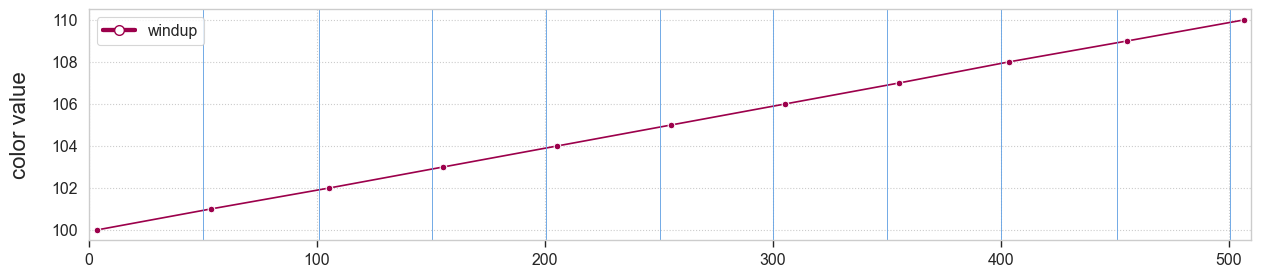

In [198]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 3), "xtick.bottom": True, "grid.linestyle": ":"})

data_single_measurements = data_measurements[data_measurements['iteration'] == I]
data_single_events = data_events[data_events['iteration'] == I]

plot = sns.lineplot(data_single_measurements[(data_single_measurements['color'] >= 100) & (data_single_measurements['color'] <= 110)], x='time_since_start', y='color', marker='o', color=PROGRAM_COLORS[PROGRAM])

for value in data_single_events[data_single_events['event_type'] == 'render_start']['time_since_start']:
    plot.axvline(value, color=COLOR_NONE, linewidth=0.5)

for value in data_single_events[data_single_events['event_type'] == 'render_stop']['time_since_start']:
    plot.axvline(value, color=COLOR_BLUE, linewidth=0.5)


handles = []
handles.append((
    mpl.lines.Line2D([0, 1, 2, 3, 4], [1, 1, 1, 1], color=PROGRAM_COLORS[PROGRAM], markerfacecolor=PROGRAM_COLORS[PROGRAM], linewidth=3),
    mpl.lines.Line2D([2], [2], marker='o', mfc='white', color=PROGRAM_COLORS[PROGRAM], markersize=7, linewidth=3)
))

legend = plot.legend(loc='upper left', handles=handles, labels=[PROGRAM])
legend.set_visible(True)


plot.set_ylabel('color value', labelpad=15, fontsize=16)
plot.set_xlabel('')
# plot.set_xlabel('time since application rendered color value 100 (ms)', labelpad=15, fontsize=16)
plot.set_xlim(0, 510)

# plt.savefig(f"../analysis/figures/{PROGRAM}_{RFR}_validation_cut.pdf", format='pdf', bbox_inches='tight')


In [199]:
# for i in range(255):
#     data_single_measurements = data_measurements[data_measurements['iteration'] == i]
#     print(i, data_single_measurements['time_since_start'].diff().mean())

In [200]:
for i in range(100, 110):
    print(len(data_single_measurements[data_single_measurements['color'] == i]))

1
1
1
1
1
1
1
1
1
1


## Dist

In [201]:
data_program

,event_type,timestamp,color,iteration,program,time_since_start
0,got color at,1719425700957411,2,0,bitblt,-4872931.75
1,got color at,1719425700958865,2,0,bitblt,-4871477.75
2,got color at,1719425700960721,2,0,bitblt,-4869621.75
3,got color at,1719425700962692,2,0,bitblt,-4867650.75
4,got color at,1719425700964706,2,0,bitblt,-4865636.75
...,...,...,...,...,...,...
15463,got color at,1719426346756838,-3,9,windup,7863276.50
15464,got color at,1719426346756846,-3,9,windup,7863284.50
15465,got color at,1719426346756854,-3,9,windup,7863292.50
15466,got color at,1719426346756863,-3,9,windup,7863301.50


In [202]:
diff_dict = {}
for iteration in range(50):
    for program in data_app['program'].unique():
        diff_dict[program] = []
        data_temp_program = data_program[(data_program['program'] == program) & (data_program['iteration'] == i)]
        data_temp_app = data_app[(data_app['program'] == program) & (data_app['iteration'] == i)]
        for color in range(5, 255):
            first_measurement_for_color = data_temp_program[data_temp_program['color'] == color]['time_since_start'].min()
            # print(program, color, len(first_measurement_for_color))
            # first_measurement_for_color = first_measurement_for_color.min()
            render_stop_for_color = data_temp_app[(data_temp_app['color'] == color) & (data_temp_app['event_type'] == 'render_stop')]['time_since_start'].min()
            if math.isnan(render_stop_for_color) or math.isnan(first_measurement_for_color):
                print(f'no value for {color}')
            else:
                diff_dict[program].append(first_measurement_for_color - render_stop_for_color.min())

no value for 5
no value for 6
no value for 7
no value for 8
no value for 9
no value for 10
no value for 11
no value for 12
no value for 13
no value for 14
no value for 15
no value for 16
no value for 17
no value for 18
no value for 19
no value for 20
no value for 21
no value for 22
no value for 23
no value for 24
no value for 25
no value for 26
no value for 27
no value for 28
no value for 29
no value for 30
no value for 31
no value for 32
no value for 33
no value for 34
no value for 35
no value for 36
no value for 37
no value for 38
no value for 39
no value for 40
no value for 41
no value for 42
no value for 43
no value for 44
no value for 45
no value for 46
no value for 47
no value for 48
no value for 49
no value for 50
no value for 51
no value for 52
no value for 53
no value for 54
no value for 55
no value for 56
no value for 57
no value for 58
no value for 59
no value for 60
no value for 61
no value for 62
no value for 63
no value for 64
no value for 65
no value for 66
no value for 

In [203]:
data_diffs = pd.DataFrame.from_dict(diff_dict)
data_melted = data_diffs.melt(var_name='program', value_name='diff')
data_melted
data_melted['diff'] = data_melted['diff'] / 1000 

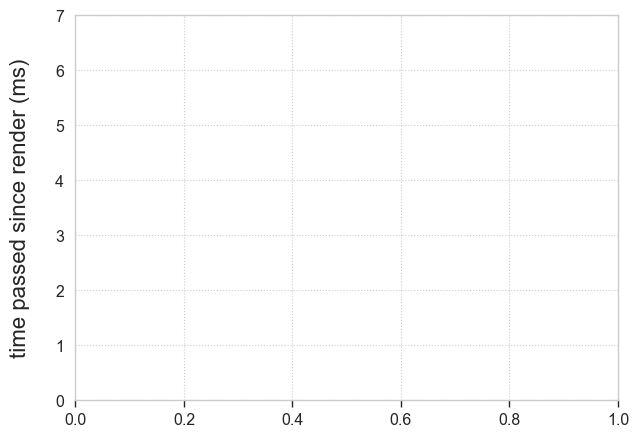

In [204]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(7, 5), "xtick.bottom": True, "grid.linestyle": ":"})

plot = sns.boxplot(data_melted, x='program', y='diff', order=['getpixel', 'bitblt', 'getdbits', 'windup'], color=COLOR_NONE, fill=False, linewidth=1.5)
plot = sns.stripplot(data_melted, x='program', y='diff', order=['getpixel', 'bitblt', 'getdbits', 'windup'], palette=[COLOR_OCKER_ANDI, COLOR_OCKER, COLOR_GLUTROT, COLOR_HEIDENELKE], size=2)

plot.set_ylim(0, 7)
plot.set_ylabel('time passed since render (ms)', labelpad=18, fontsize=16)
plot.set_xlabel('')
plt.savefig("../analysis/figures/validation_dist_{RFR}.pdf", format='pdf', bbox_inches='tight')

In [205]:
data_melted[data_melted['program'] == 'windup']['diff'].mean()

nan

In [206]:
300 / 60

5.0

: 